In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import tree

In [2]:
train_data = pd.read_csv(r'C:\ML\carinsurance\carInsurance_train.csv')

In [3]:
train_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.9+ KB


In [5]:
train_data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [6]:
train_data.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [7]:
train_data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

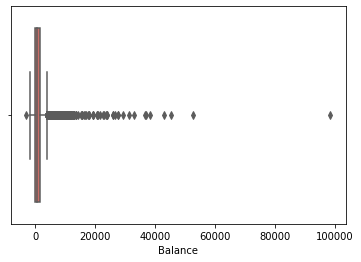

In [8]:
sns.boxplot(x='Balance',data=train_data,palette='hls');

In [9]:
train_data.Balance.max()

98417

In [10]:
train_data[train_data['Balance'] == 98417]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [11]:
train_data_new = train_data.drop(train_data.index[1742]);

In [12]:
train_data_new.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [13]:
train_data_new.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3041
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [14]:
train_data_new['Job'] = train_data_new['Job'].fillna(method ='pad')
train_data_new['Education'] = train_data_new['Education'].fillna(method ='pad')

In [15]:
train_data_new['Communication'] = train_data_new['Communication'].fillna('none')
train_data_new['Outcome'] = train_data_new['Outcome'].fillna('none')

In [16]:
train_data_new.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

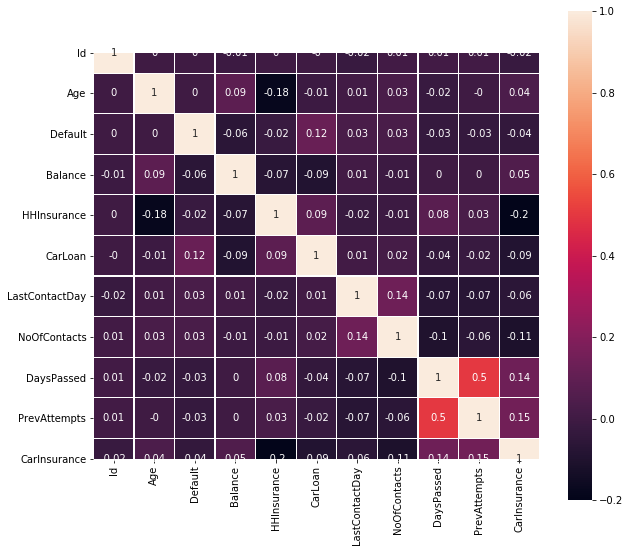

In [17]:
corr_matrix=train_data_new.corr().round(2)
plt.figure(figsize=(10,9)) 
sns.heatmap(data=corr_matrix, square=True, annot=True, linewidths=0.2)

C:\Users\Sohan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sohan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


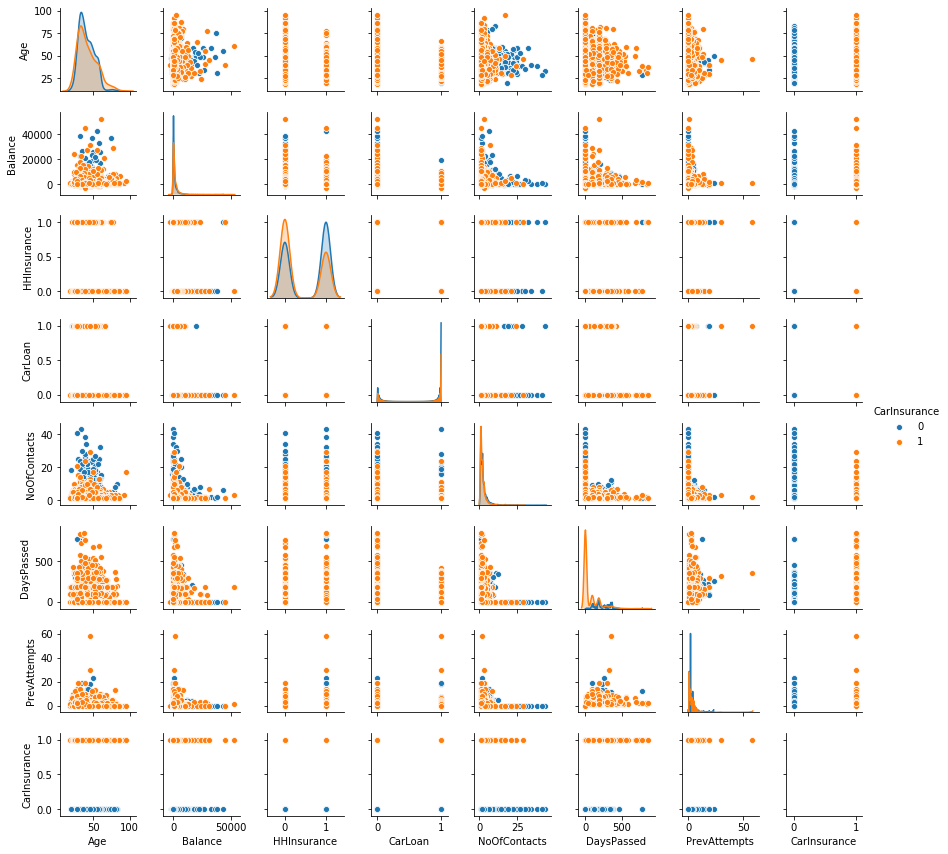

In [18]:
train_data_sub = ['Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts','CarInsurance']
sns.pairplot(train_data_new[train_data_sub],hue='CarInsurance',size=1.5);

In [19]:
train_data_new['AgeBinned'] = pd.qcut(train_data_new['Age'], 5 , labels = False)
train_data_new['BalanceBinned'] = pd.qcut(train_data_new['Balance'], 5,labels = False)

In [20]:
train_data_new['CallStart'] = pd.to_datetime(train_data_new['CallStart'] )
train_data_new['CallEnd'] = pd.to_datetime(train_data_new['CallEnd'] )

In [21]:
train_data_new['CallTime'] = (train_data_new['CallEnd'] - train_data_new['CallStart']).dt.total_seconds()

In [22]:
train_data_new['CallTimeBinned'] = pd.qcut(train_data_new['CallTime'], 5,labels = False)

In [23]:
train_data_new.drop(['Age','Balance','CallStart','CallEnd','CallTime'],axis = 1,inplace = True)

In [24]:
train_data_new.head()

,Id,Job,Marital,Education,Default,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,AgeBinned,BalanceBinned,CallTimeBinned
0,1,management,single,tertiary,0,1,0,telephone,28,jan,2,-1,0,none,0,1,3,0
1,2,blue-collar,married,primary,0,1,0,none,26,may,5,-1,0,none,0,1,3,2
2,3,management,single,tertiary,0,1,0,cellular,3,jun,1,119,1,failure,1,0,2,3
3,4,student,single,primary,0,1,0,cellular,11,may,2,-1,0,none,1,0,2,4
4,5,management,married,tertiary,0,0,0,cellular,3,jun,1,-1,0,none,0,0,4,2


In [25]:
Job = pd.get_dummies(data = train_data_new['Job'],prefix = "Job")

In [26]:
Marital= pd.get_dummies(data = train_data_new['Marital'],prefix = "Marital")

In [27]:
Education= pd.get_dummies(data = train_data_new['Education'],prefix="Education")

In [28]:
Communication = pd.get_dummies(data = train_data_new['Communication'],prefix = "Communication")

In [29]:
LastContactMonth = pd.get_dummies(data = train_data_new['LastContactMonth'],prefix= "LastContactMonth")
Outcome = pd.get_dummies(data = train_data_new['Outcome'],prefix = "Outcome")

In [30]:
train_data_new.head()

,Id,Job,Marital,Education,Default,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance,AgeBinned,BalanceBinned,CallTimeBinned
0,1,management,single,tertiary,0,1,0,telephone,28,jan,2,-1,0,none,0,1,3,0
1,2,blue-collar,married,primary,0,1,0,none,26,may,5,-1,0,none,0,1,3,2
2,3,management,single,tertiary,0,1,0,cellular,3,jun,1,119,1,failure,1,0,2,3
3,4,student,single,primary,0,1,0,cellular,11,may,2,-1,0,none,1,0,2,4
4,5,management,married,tertiary,0,0,0,cellular,3,jun,1,-1,0,none,0,0,4,2


In [31]:
train_data_new.drop(['Job','Marital','Education','Communication','LastContactMonth','Outcome'],axis=1,inplace=True)

In [32]:
train_data = pd.concat([train_data_new,Job,Marital,Education,Communication,LastContactMonth,Outcome],axis=1)

In [33]:
train_data.columns

Index(['Id', 'Default', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance',
       'AgeBinned', 'BalanceBinned', 'CallTimeBinned', 'Job_admin.',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_cellular',
       'Communication_none', 'Communication_telephone', 'LastContactMonth_apr',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Outcome_failure',
       'Outcome_none', 'Outcome_other', 'O

In [34]:
train_data.head()

,Id,Default,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,AgeBinned,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_none,Outcome_other,Outcome_success
0,1,0,1,0,28,2,-1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,0,1,0,26,5,-1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,3,0,1,0,3,1,119,1,1,0,...,1,0,0,0,0,0,1,0,0,0
3,4,0,1,0,11,2,-1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,5,0,0,0,3,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [35]:
X= train_data.drop(['CarInsurance'],axis=1).values
y=train_data['CarInsurance'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [37]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, y_pred))

Logistic Accuracy is 0.84


In [39]:
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross Validation Score = 0.81


C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       483
           1       0.80      0.80      0.80       317

    accuracy                           0.84       800
   macro avg       0.83      0.83      0.83       800
weighted avg       0.84      0.84      0.84       800



In [41]:
cm = confusion_matrix(y_test,y_pred)

In [42]:
print(cm)

[[419  64]
 [ 63 254]]


In [43]:
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
y_pred = DT.predict(X_test)

In [44]:
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, y_pred))

Decision Tree Accuracy is 0.82


In [45]:
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)

Cross Validation Score = 0.81


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       483
           1       0.74      0.85      0.79       317

    accuracy                           0.82       800
   macro avg       0.82      0.83      0.82       800
weighted avg       0.83      0.82      0.82       800



In [47]:
cm = confusion_matrix(y_test,y_pred)

In [48]:
print(cm)

[[389  94]
 [ 48 269]]


In [49]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [50]:
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

Random Forest Accuracy is 0.86


In [51]:
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

Cross Validation Score = 0.84


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       483
           1       0.80      0.85      0.82       317

    accuracy                           0.86       800
   macro avg       0.85      0.86      0.85       800
weighted avg       0.86      0.86      0.86       800



In [53]:
cm = confusion_matrix(y_test,y_pred)

In [54]:
print(cm)

[[418  65]
 [ 49 268]]


In [55]:
xgb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test) 

In [56]:
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test,xgb.predict(X_test)))

GradientBoost Accuracy= 0.85


In [57]:
score_xgb = cross_val_score(xgb, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_xgb)

Cross Validation Score = 0.84


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       483
           1       0.81      0.80      0.81       317

    accuracy                           0.85       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.85      0.85      0.85       800



In [59]:
cm = confusion_matrix(y_test,y_pred)

In [60]:
print(cm)

[[425  58]
 [ 64 253]]


In [61]:
train_data.head()

,Id,Default,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,AgeBinned,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_none,Outcome_other,Outcome_success
0,1,0,1,0,28,2,-1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,0,1,0,26,5,-1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,3,0,1,0,3,1,119,1,1,0,...,1,0,0,0,0,0,1,0,0,0
3,4,0,1,0,11,2,-1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,5,0,0,0,3,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [62]:
X1 = train_data.drop(['CarInsurance'],axis=1).values
Y=train_data['CarInsurance'].values

In [63]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size = 0.30, random_state =100)

In [64]:
model = LR.fit(X1_train,Y_train)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
y_pred = LR.predict(X1_test)

In [66]:
print ("Logistic Accuracy is %2.2f" % accuracy_score(Y_test, y_pred))

Logistic Accuracy is 0.82


In [67]:
score_LR = cross_val_score(LR, X1, Y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)

C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Cross Validation Score = 0.81


C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       727
           1       0.77      0.79      0.78       473

    accuracy                           0.82      1200
   macro avg       0.81      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



In [69]:
cm = confusion_matrix(Y_test,y_pred)

In [70]:
print(cm)

[[614 113]
 [100 373]]


In [71]:
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X1_train,Y_train)
y_pred = DT.predict(X1_test)

In [72]:
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(Y_test, y_pred))

Decision Tree Accuracy is 0.82


In [73]:
score_DT = cross_val_score(DT, X1, Y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)

Cross Validation Score = 0.81


In [74]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       727
           1       0.74      0.85      0.79       473

    accuracy                           0.82      1200
   macro avg       0.82      0.83      0.82      1200
weighted avg       0.83      0.82      0.82      1200



In [75]:
cm = confusion_matrix(Y_test,y_pred)

In [76]:
print(cm)

[[586 141]
 [ 71 402]]


In [77]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X1_train, Y_train)
y_pred = rfc.predict(X1_test)

In [78]:
print ("Random Forest Accuracy is %2.2f" % accuracy_score(Y_test, rfc.predict(X1_test)))

Random Forest Accuracy is 0.83


In [79]:
score_rfc = cross_val_score(rfc, X1, Y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

Cross Validation Score = 0.84


In [80]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       727
           1       0.76      0.85      0.80       473

    accuracy                           0.83      1200
   macro avg       0.82      0.84      0.83      1200
weighted avg       0.84      0.83      0.83      1200



In [81]:
cm = confusion_matrix(Y_test,y_pred)

In [82]:
print(cm)

[[598 129]
 [ 72 401]]


In [83]:
xgb = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)
xgb.fit(X1_train,Y_train)
y_pred = xgb.predict(X1_test) 

In [84]:
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(Y_test,xgb.predict(X1_test)))

GradientBoost Accuracy= 0.84


In [85]:
score_xgb = cross_val_score(xgb, X1, Y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_xgb)

Cross Validation Score = 0.84


In [86]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       727
           1       0.78      0.81      0.80       473

    accuracy                           0.84      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.84      0.84      0.84      1200



In [87]:
cm = confusion_matrix(Y_test,y_pred)

In [88]:
print(cm)

[[621 106]
 [ 89 384]]
